Sergi Busquets (https://github.com/seeergiii)

# AB Testing: Server Efficiency Analysis

In the bustling IT department of a corporate office, they faced the task of assessing the performance of their web servers efficiently. With a methodical approach, they decided to measure the wait times between client requests and server responses. In a routine task that mirrored their daily operations, they recorded the **wait times in milliseconds for two servers**, TA and TB, over a fixed number of requests. The data points collected were organized in a file named 'ActR08TATB.csv', ready for analysis.

**Data Source:** Universitat Oberta de Catalunya (UOC)

## 1️⃣ Test whether we can consider server A to be less efficient than server B, using a significance level at α = 0.01.

### Data overview

Let's first import the necessary libraries for data manipulation, statistics, and visualization. We wiil read the raw data from the CSV file named ActR08TATB.csv using Pandas.

In [471]:
# Import libraries
import pandas as pd
import numpy as np
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

In [472]:
# Read .csv file
data = pd.read_csv('raw_data/ActR08TATB.csv', delimiter=';')
data.head(5)

,TA,TB
0,9.67,6.45
1,9.62,9.64
2,9.50,8.53
3,10.88,9.20
4,8.94,4.55


In [473]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TA      50 non-null     float64
 1   TB      50 non-null     float64
dtypes: float64(2)
memory usage: 928.0 bytes


We create a boxplot to visually compare the response times of both servers. The boxplot shows the median, quartiles, and outliers for each server.

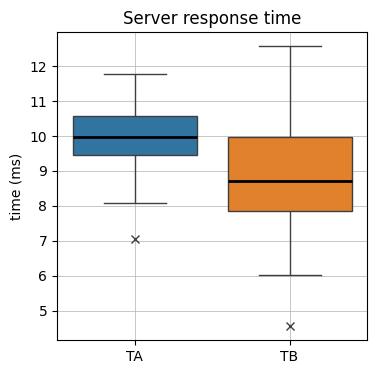

In [474]:
# Boxplots for response times on each server
plt.figure(figsize=(4, 4))
ax = sns.boxplot(data=data,
                 flierprops={"marker": "x"},
                 medianprops={"color": "black", "linewidth": 2})
plt.grid(lw=0.5)
plt.title('Server response time')
plt.ylabel('time (ms)')
plt.show()

We can see how the server response time is faster on requests made to server A compared to the ones made to server B. The median response time for server A is around 10 ms, while the median response time for server B is about 8.5 ms.

The spread of the response times is larger for server B, as the whiskers extend from 6 ms to over 12 ms, while the whiskers for server A extend from 8 ms to just below 12 ms. This shows that there is a wider range of response times on server B than on server A.

There are only two outliers detected for server A, and one outlier for server B.

### Hypothesis statements

We aim to **contrast the mean response time of the two servers**, under the assumption that greater response times indicate lesser efficiency. Therefore, we will examine whether the mean response time of server A surpasses that of server B (**one-sided test**).

**H<sub>0</sub>:** x̄<sub>A</sub> - x̄<sub>B</sub> = 0

**H<sub>a</sub>:** x̄<sub>A</sub> - x̄<sub>B</sub> > 0

### Test statistic:

Although we cannot presume normal distribution within the populations, given the substantial sample sizes for both servers exceeding 30, we will be using a **Z-test**.

$$
z = \frac{\bar{x}_{A} - \bar{x}_{B}}{\sqrt{\frac{\bar{s}_{A}^2}{n_{A}} + \frac{\bar{s}_{B}^2}{n_{B}}}}
$$

In [492]:
mean_ta = data.TA.mean()
mean_tb = data.TB.mean()

variance_ta = data.TA.var()
variance_tb = data.TB.var()

z = (mean_ta - mean_tb) / (sqrt((variance_ta/len(data.TA) + variance_tb/len(data.TB))))
z

3.7134080154690747

### P-value:

With the test statistic computed, we proceed to obtain the p-value by evaluating the Cumulative Distribution Function of a standard normal distribution, denoted as N(0,1). Since we are conducting a right-tailed test, and the cumulative distribution function yields the area to the left of the test statistic on the distribution curve, we will subtract the computed value from 1.

In [477]:
from scipy.stats import norm
1-norm.cdf(z)

0.0001022434048687515

We observe a p-value close to 0, indicating that there is a very low frequency with which the chance model produces a result more extreme than the observed result. Since this value is smaller than our chosen significance level (representing our tolerance for committing a Type I error), we reject the Null Hypothesis that the **response time on server A is significantly higher (indicating lesser efficiency) compared to server B**.

## 2️⃣ Find a 99% confidence interval for the wait time difference between the two servers, assuming equal variances.

In [478]:
from scipy import stats
z = norm.ppf(.005)
z

-2.575829303548901

In [479]:
m = z * sqrt((variance_ta/len(data.TA))+(variance_tb/len(data.TB)))
m

-0.715992154928153

In [480]:
bottom = (mean_ta-mean_tb) + m
bottom

0.3162078450718483

In [481]:
top = (mean_ta-mean_tb) - m
top

1.7481921549281543

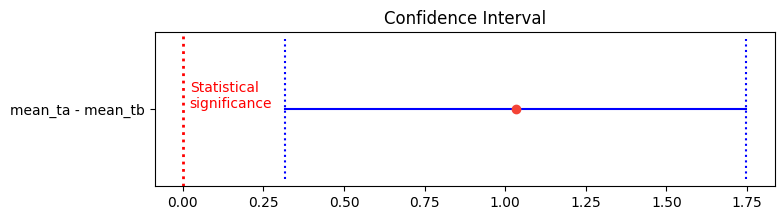

In [482]:
def plot_confidence_interval(x, top, central, bottom, color='blue', horizontal_line_width=0.25):
    left_w = x - horizontal_line_width / 4
    right_w = x + horizontal_line_width / 4
    plt.plot([top, bottom], [x, x], color=color)
    plt.plot([top, top], [left_w, right_w], color=color, linestyle='dotted')
    plt.plot([bottom, bottom], [left_w, right_w], color=color, linestyle='dotted')
    plt.plot(central, x, 'o', color='#f44336')

plt.figure(figsize=(8, 2))
plt.title('Confidence Interval')
plt.yticks([1], ['mean_ta - mean_tb'])
plt.axvline(x=0, color='red', linestyle='dotted', lw=2)
plt.annotate('Statistical\nsignificance', xy=(0, 1), xytext=(5, 1), textcoords='offset points', color='red')
plot_confidence_interval(1, top, (mean_ta - mean_tb), bottom)
plt.show()

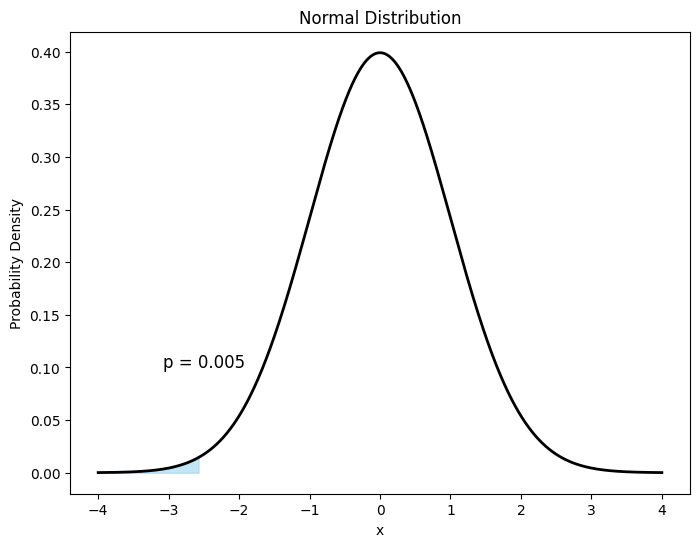

In [483]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the mean and standard deviation of the normal distribution
mu = 0
sigma = 1

# Define the p-value
p_value = 0.005
# Calculate the z-score corresponding to the p-value
z_score = norm.ppf(p_value)


x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'k-', linewidth=2)
# Shade the area under the curve for the left tail
x_fill = np.linspace(-4, z_score, 100)
y_fill = norm.pdf(x_fill, mu, sigma)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.text(z_score - 0.5, 0.1, f'p = {p_value}', fontsize=12)
plt.show()


## 3️⃣ The company has considered that a wait time is acceptable if it remains under 9 milliseconds. Can we say that the proportion of requests with acceptable wait times is different for the two servers, using a confidence level at α = 0.05?

In [484]:
tolerated_time = lambda x: 1 if x < 9 else 0
data['TA_tolerated'] = data['TA'].apply(tolerated_time)
data['TB_tolerated'] = data['TB'].apply(tolerated_time)

data.head(5)

,TA,TB,TA_tolerated,TB_tolerated
0,9.67,6.45,0,1
1,9.62,9.64,0,0
2,9.50,8.53,0,1
3,10.88,9.20,0,0
4,8.94,4.55,1,1


In [485]:
pa = len(data[data['TA_tolerated'] == 1]) / len(data.TA_tolerated)
pb = len(data[data['TB_tolerated'] == 1]) / len(data.TB_tolerated)
pa
pb

0.62

In [486]:
p_pool = (len(data.TA_tolerated) * pa + len(data.TB_tolerated) * pb) / (len(data.TA_tolerated) + len(data.TB_tolerated))
p_pool

0.37

In [487]:
z = (pa - pb) / (sqrt(p_pool * (1-p_pool) * (1/len(data.TA_tolerated) + 1/len(data.TB_tolerated))))
z

-5.178081383343334

In [488]:
2*norm.cdf(z)

2.2417943998316116e-07

reject null hypothesis

bootstraped proportion

In [489]:
# permutation test
import random

def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = list(random.sample(range(n), nB))
    idx_A = list(set(range(n)) - set(idx_B))
    return x.loc[idx_B].mean() - x.loc[idx_A].mean()

Observed difference: -50.0%


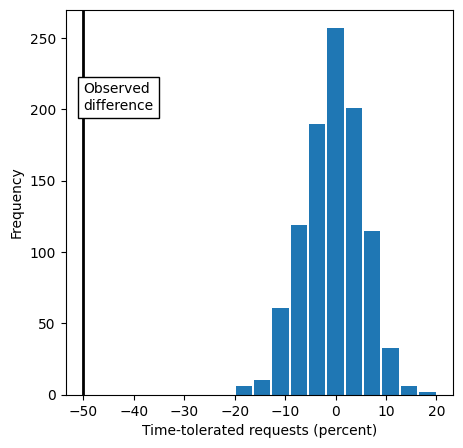

In [490]:
obs_pct_diff = (pa - pb) * 100
print(f'Observed difference: {obs_pct_diff}%')

tolerated = [0] * (len(data[data['TA_tolerated'] == 0]) + len(data[data['TA_tolerated'] == 0]))
tolerated.extend([1] * (len(data[data['TA_tolerated'] == 1]) + len(data[data['TA_tolerated'] == 1])))
tolerated = pd.Series(tolerated)

perm_diffs = [100 * perm_fun(tolerated, int(len(data.TA_tolerated)), int(len(data.TB_tolerated)))
              for _ in range(1000)]

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(obs_pct_diff, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Time-tolerated requests (percent)')
ax.set_ylabel('Frequency')
plt.show()

In [491]:
# frequency with which the chance model produces a result more extreme than the observed result
# P VALUE
np.mean([diff >= abs(obs_pct_diff) for diff in perm_diffs])

0.0